In [107]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [14]:
data=pd.read_csv('F:/Python Programs/DataSets/admission/Admission_Predict.csv')

In [15]:
data.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [16]:
data.isna().sum()

Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

In [17]:
data.drop(['Serial No.'],axis=1,inplace=True)

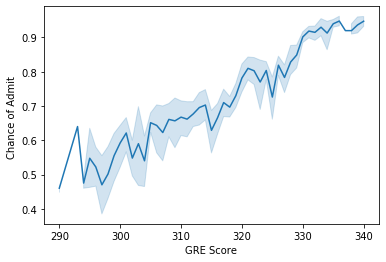

In [18]:
sns.lineplot(data['GRE Score'],data['Chance of Admit '])

In [19]:
data.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


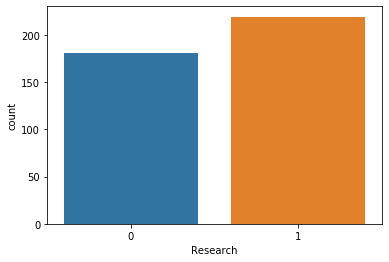

In [20]:
sns.countplot(data['Research'])

In [21]:
data['University Rating']=data['University Rating'].astype(str)

In [22]:
rating=pd.get_dummies(data['University Rating'],prefix='rating_',drop_first=True)

In [23]:
data.drop(['University Rating'],axis=1,inplace=True)

In [24]:
new_data=data.iloc[:,:2].copy()
new_data=pd.concat([new_data,rating],axis=1)
new_data=pd.concat([new_data,data.iloc[:,2:].copy()],axis=1)

In [25]:
new_data.head()

,GRE Score,TOEFL Score,rating__2,rating__3,rating__4,rating__5,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,0,0,1,0,4.5,4.5,9.65,1,0.92
1,324,107,0,0,1,0,4.0,4.5,8.87,1,0.76
2,316,104,0,1,0,0,3.0,3.5,8.00,1,0.72
3,322,110,0,1,0,0,3.5,2.5,8.67,1,0.80
4,314,103,1,0,0,0,2.0,3.0,8.21,0,0.65


In [26]:
label=new_data['Chance of Admit ']
features=new_data.drop(['Chance of Admit '],axis=1)

In [45]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor,AdaBoostRegressor

In [29]:
from sklearn.model_selection import cross_val_score
cross_val_score(RandomForestRegressor(),new_data,label,cv=5)

array([0.99977026, 0.99945418, 0.9999489 , 0.99987039, 0.99936065])

In [39]:
x_train,x_test,y_train,y_test=train_test_split(new_data,label,test_size=0.2,random_state=0)
rf=RandomForestRegressor(n_estimators=200)
rf.fit(x_train,y_train)
y_pred=rf.predict(x_test)
print('MSE : ',mean_squared_error(y_test,y_pred))
print('RMSE : ',np.sqrt(mean_squared_error(y_test,y_pred)))

MSE :  6.413624999999828e-06
RMSE :  0.00253251357350752


In [77]:
gbr=GradientBoostingRegressor(loss='huber',learning_rate=0.1,max_depth=3,alpha=0.8)
gbr.fit(x_train,y_train)
y_pred=gbr.predict(x_test)
print('MSE : ',mean_squared_error(y_test,y_pred))
print('RMSE : ',np.sqrt(mean_squared_error(y_test,y_pred)))

MSE :  2.4289968161087013e-06
RMSE :  0.0015585239222125214


In [78]:
abr=AdaBoostRegressor(base_estimator=RandomForestRegressor(),n_estimators=50,loss='linear')
abr.fit(x_train,y_train)
y_pred=abr.predict(x_test)
print('MSE : ',mean_squared_error(y_test,y_pred))
print('RMSE : ',np.sqrt(mean_squared_error(y_test,y_pred)))

MSE :  4.547375000000061e-06
RMSE :  0.002132457502507391


# RMSE on last 100 observations-----

In [84]:
train_label=new_data['Chance of Admit '][0:300]
train_features=new_data.drop('Chance of Admit ',axis=1)[0:300]

test_label=new_data['Chance of Admit '][300:]
test_features=new_data.drop('Chance of Admit ',axis=1)[300:]

In [149]:
gbr=GradientBoostingRegressor(loss='huber',learning_rate=0.1,max_depth=3,alpha=0.82,random_state=0,n_estimators=70)
gbr.fit(train_features,train_label)
y_pred=gbr.predict(test_features)
print('MSE : ',mean_squared_error(test_label,y_pred))
print('RMSE : ',np.sqrt(mean_squared_error(test_label,y_pred)))

MSE :  0.0033648322032168634
RMSE :  0.0580071737220222
